In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append('../')

# Graph imports
import src.graph as graph
import src.logit_estimator as estimator
import src.utils as utils

# usual imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gc
import random
import networkx as nx

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



#np.random.seed(42)

# Estimation with MLE

In [17]:
# beta should be higher than c
n = 1000 # number of nodes - 585 similar to c elegans
d = 1  # number of neighbouts to take into account

#sigma = np.log(1/1e-3 - 1)    # intercept the higher the harder for creating edges 6
sigma = 8

n_iteration = 100000
warm_up     = 1400 # 10k

################################################
params_dict = {
    "n": n,
    "d": d,
    "sigma": sigma,
    "n_iteration": n_iteration,
    "warm_up": warm_up
}

In [18]:
graph_model = graph.GraphModel(n=n, d=d, sigma=sigma)
graphs, spec = graph_model.populate_edges( warm_up = warm_up, max_iterations = n_iteration, threshold = 5, stability_window = 10)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
it

# Estimation with regression 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


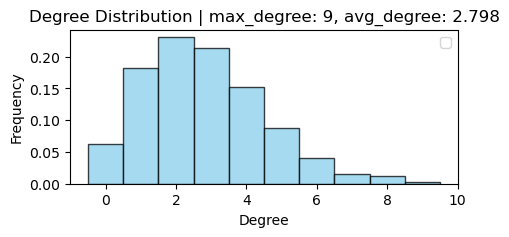

In [19]:
g = graphs[-1]
s = spec
G = nx.Graph(g)

ut = utils.GraphUtils()     
#fig = ut.plot_graph_and_spectrum(g, s, title='Graph and Spectrum', size=(10,5))

fig = ut.plot_degree_distribution(g, title='Degree Distribution', size=(5,2))
#fig = ut.plot_graph_from_adjacency(adj_matrix=g, pos=None, title='Graph', size=(7, 5))

#ut.save_graph_html(g, params_dict)

In [20]:
d = 2

est = estimator.LogitRegEstimator(g , d=d)

features, labels = est.get_features_labels()

result, params, pvalue = est.estimate_parameters(l1_wt=1, alpha=0, features=features, labels=labels)
print('real: ', -sigma)
print('est: ', params[0])

/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.037      
Date:               2024-07-01 11:40 AIC:              18534.8821 
No. Observations:   499500           BIC:              18568.2462 
Df Model:           2                Log-Likelihood:   -9264.4    
Df Residuals:       499497           LL-Null:          -9620.2    
Converged:          1.0000           LLR p-value:      3.2895e-155
No. Iterations:     31.0000          Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const    -7.3633     0.0682   -108.0387   0.0000   -7.4969   -7.2298
x1        0.0197     0.0010     20.4227   0.0000    0.0178    0.0216
x2        0.0178     0.0009     18.9314   0.0000    0.0160    0.0197

real:  -

In [32]:
summary = result.summary2()
summary.tables[1].loc['const']


Coef.        -7.363342
Std.Err.      0.068155
z          -108.038745
P>|z|         0.000000
[0.025       -7.496923
0.975]       -7.229762
Name: const, dtype: float64

# Multiple times the d influecen on model selection (AIC, BIC, GIC)

In [73]:
sigma = 8 

warm_up = 1300 # 1.4k
d_est = 3 # Test for 0,3,6

d_real = 3 # Test for 0,3,6

n_runs = 5
pathfolder = f'runs/d_sigma_{sigma}'

# Create the directory if it does not exist
if not os.path.exists(pathfolder):
    os.makedirs(pathfolder)

In [74]:
params_list = []
result_list = []

for i in range(n_runs):
    graph_model = graph.GraphModel(n=n, d=d_real, sigma=sigma)
    graphs, spec = graph_model.populate_edges( warm_up = warm_up, max_iterations = n_iteration, threshold = 5, stability_window = 10)
    g = graphs[-1]
    import gc
    del graphs
    gc.collect()

    # Estimation with different values of d
    est = estimator.LogitRegEstimator(g, d=d_est)
    features, labels = est.get_features_labels()
    result, params, pvalue = est.estimate_parameters(l1_wt=1, alpha=0, features=features, labels=labels)

    params_list.append(params)
    result_list.append(result)

    import pickle
    with open(f'{pathfolder}/results_array_iter_{i}_dest_{d_est}_dreal_{d_real}.pkl', 'wb') as f:
        pickle.dump(result_list, f)



iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
it

/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.032      
Date:               2024-07-01 12:33 AIC:              17496.5878 
No. Observations:   499500           BIC:              17529.9519 
Df Model:           2                Log-Likelihood:   -8745.3    
Df Residuals:       499497           LL-Null:          -9034.9    
Converged:          1.0000           LLR p-value:      1.6429e-126
No. Iterations:     22.0000          Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const    -7.3230     0.0690   -106.1903   0.0000   -7.4582   -7.1878
x1        0.0093     0.0005     17.7328   0.0000    0.0083    0.0103
x2        0.0098     0.0005     18.1046   0.0000    0.0087    0.0108

iteratio

/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.033      
Date:               2024-07-01 12:33 AIC:              17496.5274 
No. Observations:   499500           BIC:              17529.8915 
Df Model:           2                Log-Likelihood:   -8745.3    
Df Residuals:       499497           LL-Null:          -9046.8    
Converged:          1.0000           LLR p-value:      1.0870e-131
No. Iterations:     26.0000          Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const    -7.3914     0.0717   -103.0689   0.0000   -7.5320   -7.2509
x1        0.0099     0.0005     18.3598   0.0000    0.0088    0.0110
x2        0.0098     0.0006     17.5440   0.0000    0.0087    0.0109

iteratio

/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.028      
Date:               2024-07-01 12:33 AIC:              17573.0429 
No. Observations:   499500           BIC:              17606.4069 
Df Model:           2                Log-Likelihood:   -8783.5    
Df Residuals:       499497           LL-Null:          -9040.9    
Converged:          1.0000           LLR p-value:      1.7152e-112
No. Iterations:     21.0000          Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const    -7.2156     0.0674   -107.0372   0.0000   -7.3477   -7.0835
x1        0.0094     0.0005     17.4143   0.0000    0.0084    0.0105
x2        0.0089     0.0005     16.3727   0.0000    0.0079    0.0100

iteratio

/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.036      
Date:               2024-07-01 12:33 AIC:              17454.4392 
No. Observations:   499500           BIC:              17487.8033 
Df Model:           2                Log-Likelihood:   -8724.2    
Df Residuals:       499497           LL-Null:          -9046.8    
Converged:          1.0000           LLR p-value:      7.8869e-141
No. Iterations:     24.0000          Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const    -7.4992     0.0742   -101.0169   0.0000   -7.6447   -7.3537
x1        0.0100     0.0005     18.3417   0.0000    0.0089    0.0111
x2        0.0108     0.0006     18.6902   0.0000    0.0097    0.0119

iteratio

/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/maruanottoni/miniforge3/envs/logit_graph/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.030      
Date:               2024-07-01 12:33 AIC:              17529.9284 
No. Observations:   499500           BIC:              17563.2925 
Df Model:           2                Log-Likelihood:   -8762.0    
Df Residuals:       499497           LL-Null:          -9034.9    
Converged:          1.0000           LLR p-value:      2.8538e-119
No. Iterations:     25.0000          Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
const    -7.2852     0.0692   -105.2276   0.0000   -7.4209   -7.1495
x1        0.0094     0.0005     17.2777   0.0000    0.0083    0.0104
x2        0.0098     0.0006     17.2601   0.0000    0.0087    0.0109

